In [ ]:
#Visualiser of markers adapted from Sinead's code.
#Better visualisation requires rendering with mesh driven by skeleton
#(extracted from Vicon)

In [1]:
%matplotlib notebook

In [2]:
import json
import numpy as np
import cv2
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import sys, os

#Add path to utils
sys.path.insert(1, 'C:/Users/georg/OneDrive/Desktop/Research/dev/Source')
from utils import utils

In [3]:
def SetValues():
    pathToMainDataset = 'C:/Users/georg/OneDrive/Desktop/Research/Data'
    dog = 'dog1'
    motion = 'walk'
    cameraFrame = 0
    
    return pathToMainDataset, dog, motion, cameraFrame

In [4]:
pathToMainDataset, dog, motion, cameraFrame = SetValues()
pathToMotion = os.path.join(pathToMainDataset, dog, 'motion_%s'%motion)

In [5]:
#Obtain mocap markers from markers.json

markerFile = os.path.join(pathToMotion, 'motion_capture', 'markers.json')
markerFile_asNp = markerFile[:markerFile.rfind('.')] + '.npy'
markerFile_namesText = markerFile[:markerFile.rfind('.')] + '_names.txt'

if os.path.isfile(markerFile_asNp):
    markers = np.load(markerFile_asNp)
    with open(markerFile_namesText, 'r') as f:
        markerNames_joined = f.read()
    markerNames = markerNames_joined.split(',')
else:
    [markerNames, markers] = utils.GetPointsFromJsonFbx(markerFile)
    markers = utils.MovePointsOutOfMayaCoordSystem(markers)
    np.save(markerFile_asNp, markers)
    markerNames_joined = ','.join(markerNames)
    with open(markerFile_namesText, 'w') as f:
        f.write(markerNames_joined)
markers = markers[:,:,cameraFrame]

In [6]:
# use the vskSticks.txt file to get the connection between markers

vskSticks = os.path.join(pathToMainDataset, dog, 'meta', 'vskSticks.txt')

markerConn = []
with open(vskSticks, 'r') as myFile:
    for f in myFile:
        res = [x.strip() for x in f.split(' ')]
        #convert from name to index
        markerConn.append([markerNames.index(res[0]), markerNames.index(res[1])])

<IPython.core.display.Javascript object>


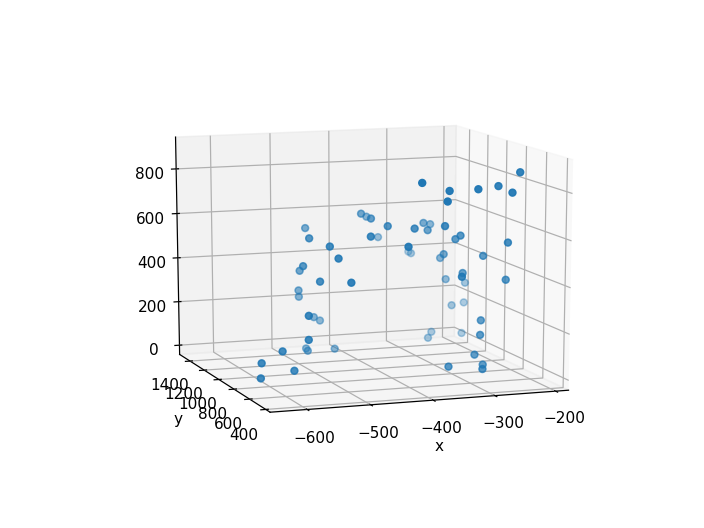

In [38]:
#Plot markers with connections

fig = plt.figure(); ax = fig.add_subplot(111, projection='3d') 

#With connections:
#ax, fig = utils.Plot3d(markers, connections=markerConn, style='ko--', ax=ax, differentColoursForSides=True)

#Without connections:
ax.scatter(markers[:,0], markers[:,1], markers[:,2])

ax.set_xlabel('x');ax.set_ylabel('y');ax.set_aspect('auto');
#plt.title('markers in black, skeleton in colour'); plt.show()